In [17]:
# Import libraries
import pandas as pd
import numpy as np

In [18]:
# Read dataset
dataset = pd.read_csv('ion_entact_pos.csv')
dataset = dataset.select_dtypes([np.number])

In [19]:
dataset.head()

,mean_RT,n_Repeated_Hits,DTXSID_Isomer,Observed_Isomer,Isomer_Number,Isomer_Order,Questionable_Hit,Corrected_HighConc,Corrected_MidConc,Corrected_LowConc,...,RCHO,RCOR,RCOOH,RCOOR,ROR,RCCH,RCN,RINGS,AROMATIC,log_RF_Average
0,3.23,1.0,0,0,NaN,NaN,0.0,0.49,0.122,0.024,...,0,0,0,0,0,0,0,1,1,7.55
1,5.70,1.0,0,0,NaN,NaN,0.0,0.49,0.122,0.024,...,0,0,0,0,0,0,0,1,1,7.71
2,1.80,4.0,0,0,NaN,NaN,0.0,0.49,0.122,0.024,...,0,0,0,0,0,0,0,1,1,7.54
3,5.12,1.0,0,0,NaN,NaN,0.0,0.49,0.122,0.024,...,0,0,0,1,0,0,0,4,3,6.91
4,3.24,1.0,0,0,NaN,NaN,0.0,0.49,0.122,0.024,...,0,0,1,0,0,0,0,3,3,7.04


In [20]:
dataset.columns.values

array(['mean_RT', 'n_Repeated_Hits', 'DTXSID_Isomer', 'Observed_Isomer',
       'Isomer_Number', 'Isomer_Order', 'Questionable_Hit',
       'Corrected_HighConc', 'Corrected_MidConc', 'Corrected_LowConc',
       'mean_High_Intensity', 'mean_Mid_Intensity', 'mean_Low_Intensity',
       'std_High_Intensity', 'std_Mid_Intensity', 'std_Low_Intensity',
       'RF_HighConc', 'RF_MedConc', 'RF_LowConc', 'RF_Average', 'E QSPR',
       'S QSPR', 'A QSPR', 'B QSPR', 'V', 'L QSPR', 'MW', 'Ncharges', 'C',
       'Cl', 'N', 'O', 'S', 'F', 'P', 'H', 'Br', 'Si', 'I', 'RNH2',
       'R2NH', 'R3N', 'ROPO3', 'ROH', 'RCHO', 'RCOR', 'RCOOH', 'RCOOR',
       'ROR', 'RCCH', 'RCN', 'RINGS', 'AROMATIC', 'log_RF_Average'],
      dtype=object)

In [21]:
X = dataset.loc[:, 'E QSPR':'AROMATIC'].values
y = dataset.loc[:, 'log_RF_Average'].values

In [22]:
X

array([[1.29, 1.5 , 0.38, ..., 0.  , 1.  , 1.  ],
       [1.34, 1.7 , 0.38, ..., 0.  , 1.  , 1.  ],
       [1.38, 1.88, 0.27, ..., 0.  , 1.  , 1.  ],
       ...,
       [1.3 , 1.54, 0.  , ..., 0.  , 2.  , 2.  ],
       [2.55, 3.08, 0.  , ..., 0.  , 4.  , 3.  ],
       [2.08, 1.98, 0.26, ..., 0.  , 2.  , 2.  ]])

In [23]:
# y-randomization - use only in y-randomization analysis
#from sklearn.utils import shuffle
#y = shuffle(y, random_state=4)

In [24]:
# Split dataset into training and testing datasets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

In [25]:
# Normalize data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [26]:
# Compile RF regressor
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=200, random_state=0)
regressor.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [27]:
# Use model to make predictions for training set
y_pred = regressor.predict(X_train).flatten()

In [28]:
# Calculate error statistics
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

Mean Absolute Error: 0.1279782082324455
Mean Squared Error: 0.030770581452784496
Root Mean Squared Error: 0.17541545385964286


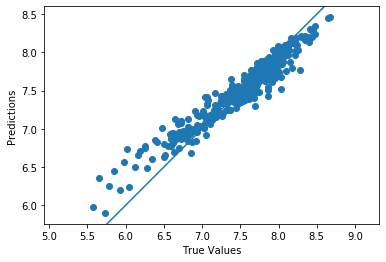

In [29]:
import matplotlib.pyplot as plt
plt.scatter(y_train, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
_ = plt.plot([-100, 100], [-100, 100])
plt.show()

In [14]:
# Export data into a dataframe
import pandas as pd
df = pd.DataFrame({'predicted_values':y_pred, 'true_values':y_train,})
print(df.head())

   predicted_values  true_values
0           7.43375         7.39
1           7.75860         8.17
2           7.40210         7.48
3           7.52670         7.71
4           7.71005         8.04


In [477]:
# Print data into a csv file
df.to_csv('forest_plus_tr_1.csv')

In [30]:
# Use model to make predictions for the testing set
y_pred = regressor.predict(X_test).flatten()

In [31]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.30357884615384595
Mean Squared Error: 0.18309211100961495
Root Mean Squared Error: 0.42789263958335966


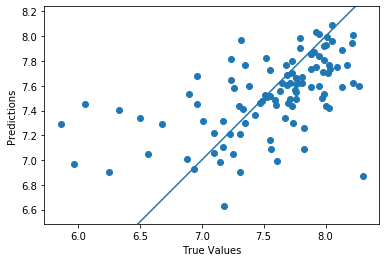

In [32]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
_ = plt.plot([-100, 100], [-100, 100])
plt.show()

In [33]:
# Export data to a dataframe
import pandas as pd
df = pd.DataFrame({'predicted_values':y_pred, 'true_values':y_test,})
print(df.head())

   predicted_values  true_values
0           7.92195         7.99
1           7.72635         7.55
2           7.44375         7.60
3           7.04520         7.25
4           7.61960         7.78


In [482]:
# Print data to a csv file
df.to_csv('forestplus_ts_1.csv')

In [483]:
#Summarize results into one csv file
ts1 = pd.read_csv('forestplus_ts_1.csv')
ts2 = pd.read_csv('forestplus_ts_2.csv')
ts3 = pd.read_csv('forestplus_ts_3.csv')
ts4 = pd.read_csv('forestplus_ts_4.csv')
ts5 = pd.read_csv('forestplus_ts_5.csv')
ts = pd.concat([ts1,ts2,ts3,ts4,ts5], axis=0)

tr1 = pd.read_csv('forest_plus_tr_1.csv')
tr2 = pd.read_csv('forest_plus_tr_2.csv')
tr3 = pd.read_csv('forest_plus_tr_3.csv')
tr4 = pd.read_csv('forest_plus_tr_4.csv')
tr5 = pd.read_csv('forest_plus_tr_5.csv')
tr = pd.concat([tr1,tr2,tr3,tr4,tr5], axis=0)

ts.to_csv('forestplus_ts.csv')
tr.to_csv('forestplus_tr.csv')